# Part 0: Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.ex2 import *
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)    

# Part 1: Load and Plot Data
**NOTE THAT**
1. Indexing Numpy array with intergers and booleans are different. When indexing with booleans, the boolean array should be a one dimensional array or have the same shape as the indexed array. Details at [Numpy Tutorial: Fancy indexing and index tricks](https://docs.scipy.org/doc/numpy/user/quickstart.html#fancy-indexing-and-index-tricks).
2. When plotting with matplotlib.pyplot.plot, if the first parameter is 2-dimensional, the columns of this array is interpreted as separate data sets.

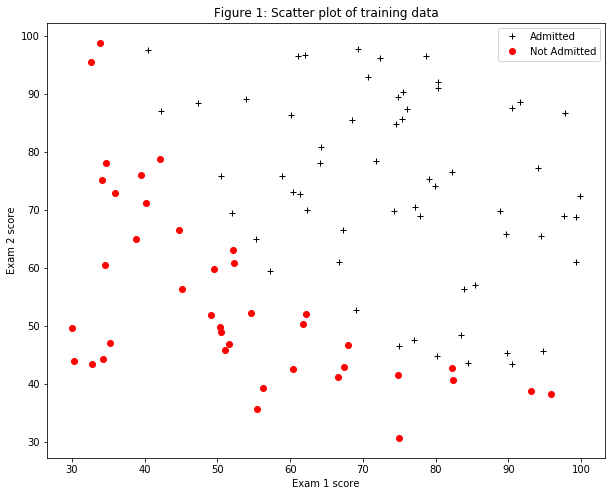

In [4]:
# The first two columns contains the exam scores and the third column contains the label.
data = np.loadtxt('./data/ex2data1.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2:3]
plt.title('Figure 1: Scatter plot of training data')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
X_pos = X[y.reshape(-1) == 1]
X_neg = X[y.reshape(-1) == 0]
plt.plot(X_pos[:, 0], X_pos[:, 1], 'k+', label='Admitted')
plt.plot(X_neg[:, 0], X_neg[:, 1], 'ro', label='Not Admitted')
plt.legend()
plt.show()

# Part 2: Compute Cost and Gradient

In [5]:
# Add one column of ones to X
N, M = X.shape
X_ori = X
X = np.hstack((np.ones((N, 1)), X_ori))

In [6]:
# Compute and display initial cost and gradient
initial_theta = np.zeros(M + 1)
cost, grad = cost_function(initial_theta, X, y)
print('Cost at initial theta (zeros): %f' % cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):')
print(grad)
print('Expected gradients (approx): [ -0.1000 -12.0092 -11.2628 ]\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = cost_function(test_theta, X, y)
print('Cost at test theta: %f' % cost)
print('Expected cost (approx): 0.218')
print('Gradient at test theta: ')
print(grad)
print('Expected gradients (approx): [ 0.043 2.566 2.647]')

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx): [ -0.1000 -12.0092 -11.2628 ]

Cost at test theta: 0.218330
Expected cost (approx): 0.218
Gradient at test theta: 
[0.04290299 2.56623412 2.64679737]
Expected gradients (approx): [ 0.043 2.566 2.647]


# Part 3: Optimizing

Found minimized cost 0.203498 at  [-25.16133284   0.2062317    0.2014716 ]
Expected cost (approx): 0.203
Expected theta (approx): [-25.161 0.206 0.201]


/home/mwb/Documents/ml-ng/ex2/src/ex2.py:31: RuntimeWarning: divide by zero encountered in log
  cost = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
/home/mwb/Documents/ml-ng/ex2/src/ex2.py:31: RuntimeWarning: invalid value encountered in multiply
  cost = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))


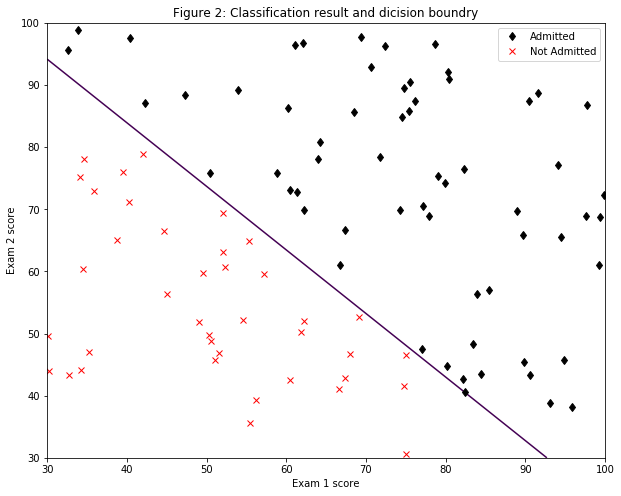

In [7]:
from scipy.optimize import minimize
cost = lambda theta, X, y: cost_function(theta, X, y)[0]
grad = lambda theta, X, y: cost_function(theta, X, y)[1]
result = minimize(cost, initial_theta, args=(X, y), jac=grad, options={'maxiter': 400})
if result.success:
    theta = result.x
    print('Found minimized cost %f at ' % result.fun, theta)
    print('Expected cost (approx): 0.203');
    print('Expected theta (approx): [-25.161 0.206 0.201]')
    
    plt.title('Figure 2: Classification result and dicision boundry')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    # Plot prediction result
    weighted_sum = X @ theta.reshape(-1, 1)
    X_pos = X_ori[weighted_sum.reshape(-1) >= 0]
    X_neg = X_ori[weighted_sum.reshape(-1) <  0]
    plt.plot(X_pos[:, 0], X_pos[:, 1], 'kd', label='Admitted')
    plt.plot(X_neg[:, 0], X_neg[:, 1], 'rx', label='Not Admitted')
    # Plot decision boundary
    scale = 10
    tmp = np.linspace(30, 100, scale)
    scores_1, scores_2 = np.meshgrid(tmp, tmp, indexing='ij')
    XX = np.hstack((np.ones((scale * scale, 1)), scores_1.reshape(-1, 1), scores_2.reshape(-1, 1)))
    Z = (XX @ theta.reshape(-1, 1)).reshape(scale, scale)
    c = plt.contour(scores_1, scores_2, Z, levels=[0])
    plt.legend()
    plt.show()
    
else:
    print('FAIL to optimize ...')


Note: Possible of calculating log0 which raise RuntimeWarning ...

# Part 4: Predict and Accuracies

For a student with scores 45 and 85, we predict an admission probability of 0.776291
Expected value: 0.775 +/- 0.002
Train Accuracy: 89.000000
Expected accuracy (approx): 89.0


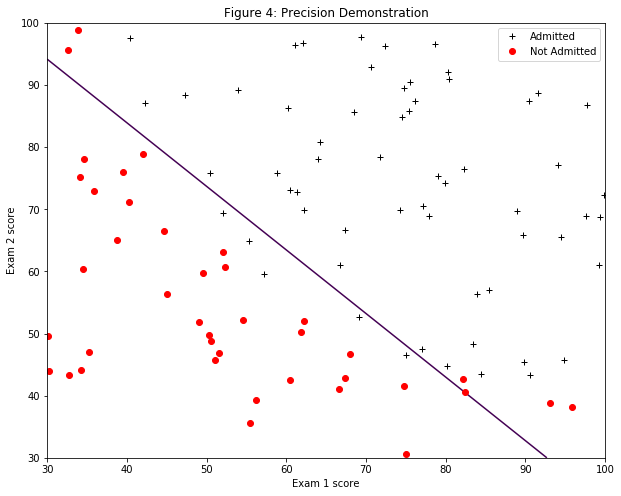

In [8]:
# Predict probability for a student with score 45 on exam 1 and score 85 on exam 2 
prob = sigmoid(np.sum(np.array([1, 45, 85]) * theta))
print('For a student with scores 45 and 85, we predict an admission probability of %f' % prob)
print('Expected value: 0.775 +/- 0.002')

# Compute accuracy on our training set
predicted_label = weighted_sum >= 0
actual_label = y > 0.5
mask_fault = np.logical_xor(predicted_label, actual_label).flatten()
num_fault = np.sum(mask_fault)
accuracy = (N - num_fault) / N
print('Train Accuracy: %f' % (100 * accuracy))
print('Expected accuracy (approx): 89.0')

# Plot precision
plt.title('Figure 4: Precision Demonstration')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
X_pos = X_ori[y.reshape(-1) == 1]
X_neg = X_ori[y.reshape(-1) == 0]
plt.plot(X_pos[:, 0], X_pos[:, 1], 'k+', label='Admitted')
plt.plot(X_neg[:, 0], X_neg[:, 1], 'ro', label='Not Admitted')
# Plot decision boundary
c = plt.contour(scores_1, scores_2, Z, levels=[0])
plt.legend()
plt.show()
